<a href="https://colab.research.google.com/github/kiran9615/task_3_EDA_on_Sample_Superstore/blob/main/task_3_EDA_on_Sample_Superstore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**The Sparks Foundation**

##**GRIP MARCH 22 (Data Science and Business Analytics)**

###**Task 3 - Exploratory data Analysis - Retail**

###**Author - Kiran Mahara**

###**Objective :**

* Perform Exploratory Data Analysis on dataset **Sample Superstore**
* As a Business Manager, try to find out the weak areas where you can work to make more profit
* To find all Business problems by exploring the data

#**Exploratory Data Analysis**

In [1]:
#importing all the necessary modules required during the analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**Link to download dataset : https://bit.ly/3i4rbWl**

In [2]:
#mounting google drive in colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#reading samplesuperstore csv data and storing it in superstore_df dataframe
file_path='/content/drive/MyDrive/Datascience/Sparks foundation provided datasets/SampleSuperstore.csv'
superstore_df=pd.read_csv(file_path)

# ***Part 1: Basic Data preprocessing and cleaning***

In [4]:
#----------------------Block 1----------------------------------

#checking for the number of observations and features in the dataset
superstore_df.shape

(9994, 13)

So, the data has 9994 observations with 13 different features.

In [5]:
#----------------------Block 2----------------------------------

#visualising first five observations from the dataset
superstore_df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


##*Data Dictionary*

*Ship Mode - Mode of shipping used for shipment delivery*

*Segment - Customer segment product was shipped to*

*Country - Country in which the shipment was delivered*

*City - City in which the shipment was delivered*

*State - State in which the shipment was delivered*

*Postal Code - Pin code of the place where shipment was delivered*

*Region - Country region (East, West, North, South)*

*Category - The category product belongs to*

*Sub-Category - Sub category of the product*

*Sales - Sales made in US dollar*

*Quantity - Quantity of the product delivered*

*Discount - Discount on the product*

*Profit - Profit from the shipment*

In [6]:
#----------------------Block 3----------------------------------

#checking basic info about features
superstore_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [7]:

#----------------------Block 4----------------------------------

#checking for null values in the data
superstore_df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

*So, there are no any null values in the data.*

In [8]:
#----------------------Block 5----------------------------------

superstore_df.duplicated().sum() #checking for duplicate observations

17

So, there are 17 dublicate observations in the given dataset

In [9]:
#----------------------Block 6----------------------------------

#Dropping the duplicated rows
superstore_df.drop_duplicates(inplace = True)

In [10]:
#----------------------Block 7----------------------------------

features_subset=['Ship Mode','Segment','Country','Region','Category','Sub-Category','Discount'] #defining list of columns as features_subset
for col in features_subset:
  print(f"Unique categories of {col}:\n\n",superstore_df[col].value_counts()) #printing value counts for each category for features of features_subset
  print("\n-----------------------------------------------------")

Unique categories of Ship Mode:

 Standard Class    5955
Second Class      1943
First Class       1537
Same Day           542
Name: Ship Mode, dtype: int64

-----------------------------------------------------
Unique categories of Segment:

 Consumer       5183
Corporate      3015
Home Office    1779
Name: Segment, dtype: int64

-----------------------------------------------------
Unique categories of Country:

 United States    9977
Name: Country, dtype: int64

-----------------------------------------------------
Unique categories of Region:

 West       3193
East       2845
Central    2319
South      1620
Name: Region, dtype: int64

-----------------------------------------------------
Unique categories of Category:

 Office Supplies    6012
Furniture          2118
Technology         1847
Name: Category, dtype: int64

-----------------------------------------------------
Unique categories of Sub-Category:

 Binders        1522
Paper          1359
Furnishings     956
Phones        

*From above we observed that:*
* *Most preferred ship mode is standard class and least preferred is same day. Possible reason could be that standard class is cheapest one and same class is expensive one.*
* *Consumer segment has most number of shipment while home office has minimum.*
* *West region has most of the shipment followed by east.*
* *Office supplies is most ordered category.*
* *Discount on products is within the range of 0 to 80 percent.*

**We have only one country US in our data,and it's of no any use for analysis, so we can drop it.**

In [11]:
#----------------------Block 8----------------------------------

#dropping feature Country
superstore_df.drop(columns='Country',inplace=True)
superstore_df.head()

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [12]:
#----------------------Block 9----------------------------------

superstore_df[['Sales','Profit']].describe() #checking for statistical summary of sales and profit features

,Sales,Profit
count,9977.000000,9977.00000
mean,230.148902,28.69013
std,623.721409,234.45784
min,0.444000,-6599.97800
25%,17.300000,1.72620
50%,54.816000,8.67100
75%,209.970000,29.37200
max,22638.480000,8399.97600


*We can see that, both Sales and Profit column has outliers*

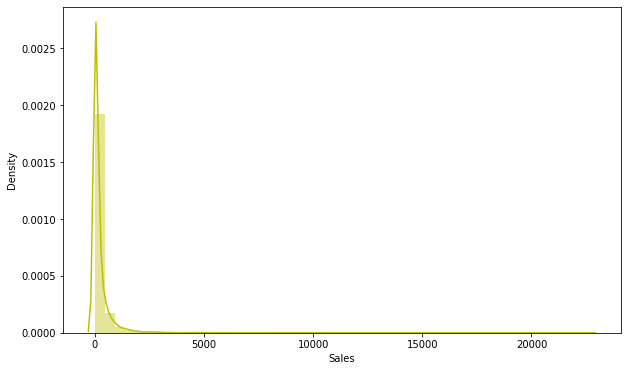

In [13]:
#----------------------Block 10----------------------------------

#visualising observation found in block 9
plt.rcParams['figure.figsize']=(10,6) #defining figure
sns.distplot(superstore_df['Sales'],color='y') #distplot for sales column

*distribution plot for sales column is highly right skewed due to outliers, most of the values for sales under 2000, so let's take 2000 as threshold for sales for EDA.*

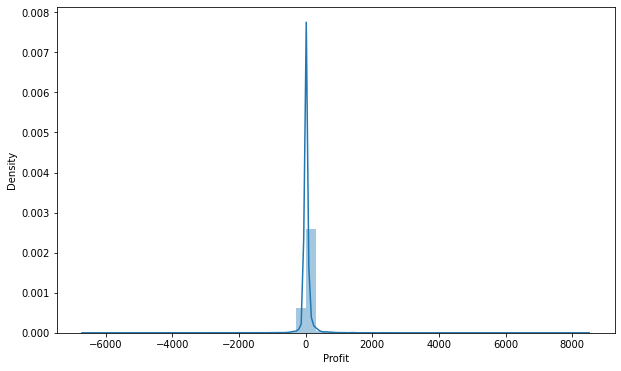

In [14]:
#----------------------Block 11----------------------------------

#visualising observation found on block 9
sns.distplot(superstore_df['Profit']) #distplot for profit column

*distribution plot for profit column is normally distributed, but there is presence of so many outliers in it, most of profit values in between -1000 to 1000, so let's make this as threshold for profit column for EDA.*

In [15]:
#----------------------Block 12----------------------------------

#creating a new dataframe with values of sales and profit under threshold
updated_superstore_df=superstore_df[(superstore_df['Sales']<2000)] #to choose rows where sales value is under threshold
updated_superstore_df=updated_superstore_df[(superstore_df['Profit']<1000) & (-1000< superstore_df['Profit'])] #to choose rows where profit value is under threshold
updated_superstore_df.head()

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [16]:
#----------------------Block 13----------------------------------

updated_superstore_df.shape #checking for the shape of updated dataframe

(9825, 12)

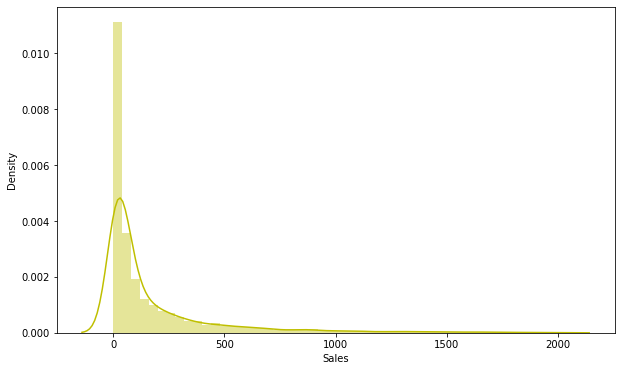

In [17]:
#----------------------Block 14----------------------------------

sns.distplot(updated_superstore_df['Sales'],color='y') #distplot of sales for updated observations

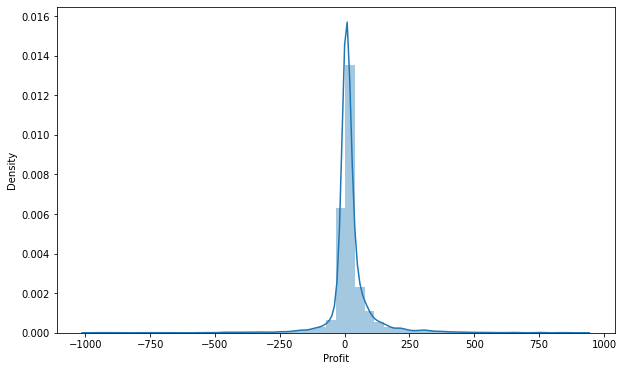

In [18]:
#----------------------Block 15----------------------------------

sns.distplot(updated_superstore_df['Profit']) #distplot of profit for updated observations

*From blocks 14 and 15 we can see, there is still presence of some outliers but it is managable.*

#**Part 2: Feature analysis**

##**Visualising and analysing about how ship mode, segment are related to sales and profit**

###**How does average sales and average profit varying across each ship mode?**

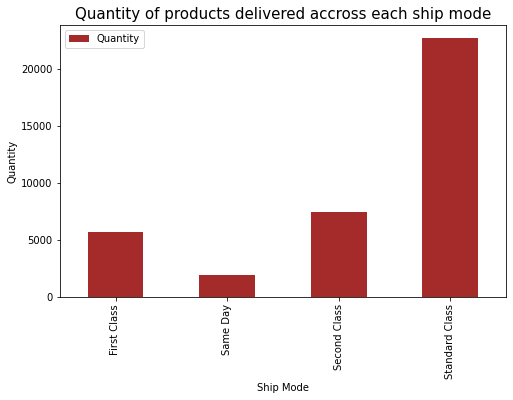

In [19]:
#----------------------Block 16----------------------------------

#visualising shipment across different ship modes
plt.rcParams['figure.figsize']=(8,5) #defining figure
superstore_df.groupby('Ship Mode').agg({'Quantity':'sum'}).plot.bar(color='brown') #bar plot for product delivered accross each ship mode
plt.title('Quantity of products delivered accross each ship mode',fontsize=15) #to set title for the plot
plt.ylabel('Quantity')  #to set label for y-axis
plt.show() #to show the graph

In [20]:
#----------------------Block 17----------------------------------

#grouping by ship mode and finding average of sales and profit in updated superstore dataframe
ship_mode_avg_price_df=updated_superstore_df.groupby('Ship Mode').agg({'Sales':'mean','Profit':'mean'}).sort_values(by='Profit',ascending=False)
ship_mode_avg_price_df.rename(columns={'Profit':'Avg profit in USD','Sales':'Avg sales in USD'},inplace=True) #renaming the profit and sales column
ship_mode_avg_price_df

,Avg sales in USD,Avg profit in USD
Ship Mode,,
Same Day,184.738298,25.230473
Second Class,182.888890,24.264646
Standard Class,175.218066,19.964266
First Class,173.581209,19.636760


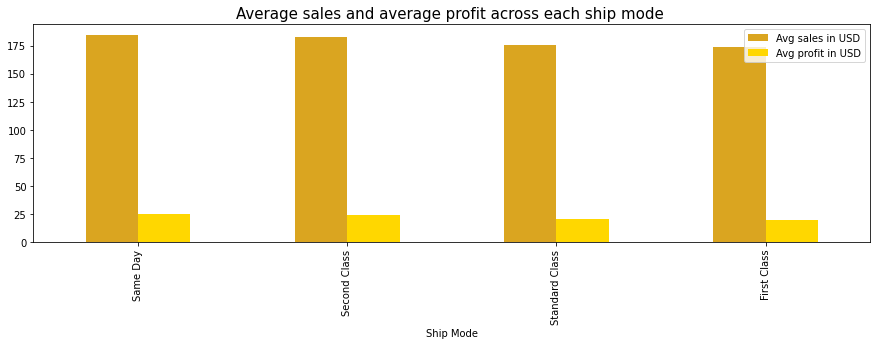

In [21]:
#----------------------Block 18----------------------------------

#visualising the above observation
plt.rcParams['figure.figsize']=(15,4) #defining figure
ship_mode_avg_price_df.plot.bar(color=['goldenrod','gold']) #bar plot for average sales and profit accross each ship mode
plt.title('Average sales and average profit across each ship mode ',fontsize=15) 
plt.show() 

*Though standard class is most preferrable and same day is least but average profit and average sales for Same Day mode of shipment is maximum, the possible reason for this could be its high cost due to which instead of having a few customers, sales and profit is high.*



###**How does average sales and average profit varying across each segment?**

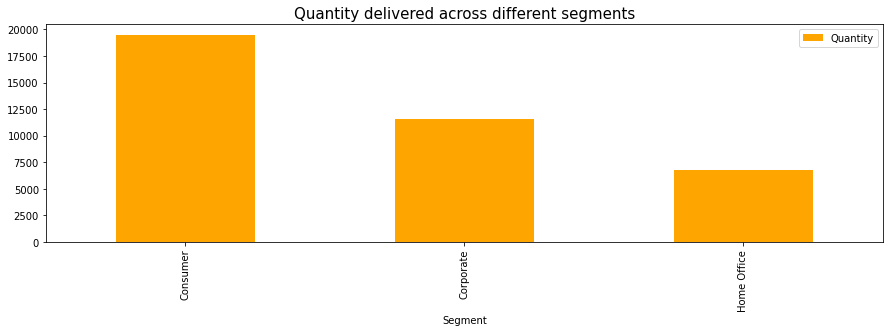

In [22]:
#----------------------Block 19----------------------------------

#visualising shipment across different segments
superstore_df.groupby('Segment').agg({'Quantity':'sum'}).plot.bar(color='orange')  #bar plot for quantity delivered across different segments
plt.title('Quantity delivered across different segments',fontsize=15)
plt.show()

In [23]:
#----------------------Block 20----------------------------------

segment_sales_profit_df=updated_superstore_df.groupby('Segment').agg({'Sales':'mean','Profit':'mean'}) #grouping by segment and finding average of sales and profit
segment_sales_profit_df.rename(columns={'Profit':'Avg profit','Sales':'Avg sales in USD'},inplace=True) #renaming the column
segment_sales_profit_df

,Avg sales in USD,Avg profit
Segment,,
Consumer,173.312435,20.110355
Corporate,184.847777,20.863108
Home Office,174.293968,24.046988


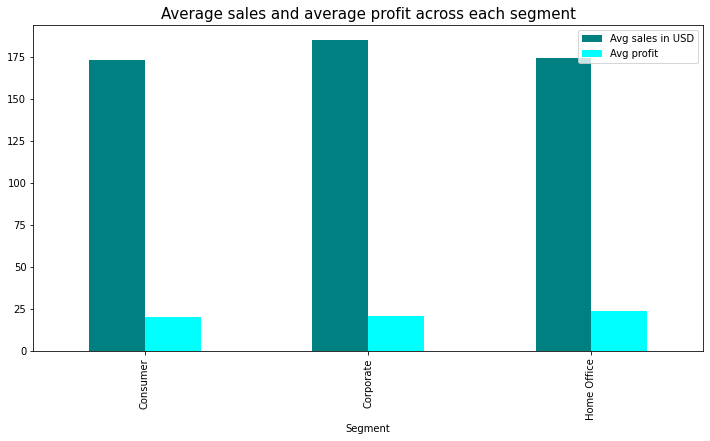

In [24]:
#----------------------Block 21----------------------------------

#visulising block 20 observation using bar plot
plt.rcParams['figure.figsize']=(12,6)  #defining figure
segment_sales_profit_df.plot.bar(color=['teal','cyan']) #bar plot for average sales and profit across each segment
plt.title('Average sales and average profit across each segment',fontsize=15)
plt.show()

###**How does average sales and average profit varying across each segment and each ship mode?**

In [25]:
 #----------------------Block 22----------------------------------

#grouping by segment and ship mode and finding average of sales and profit
segment_avgsalesnprofit_df=updated_superstore_df.groupby(['Segment','Ship Mode']).agg({'Sales':'mean','Profit':'mean'}).reset_index() 
segment_avgsalesnprofit_df.rename(columns={'Profit':'Avg profit in USD','Sales':'Avg sales in USD'},inplace=True)
segment_avgsalesnprofit_df

,Segment,Ship Mode,Avg sales in USD,Avg profit in USD
0,Consumer,First Class,168.911083,22.102997
1,Consumer,Same Day,160.489965,22.829214
2,Consumer,Second Class,166.734080,20.843512
3,Consumer,Standard Class,177.917689,19.087434
4,Corporate,First Class,182.043937,19.759128
5,Corporate,Same Day,270.969216,23.325425
6,Corporate,Second Class,190.697884,24.221111
7,Corporate,Standard Class,178.281182,19.880710
8,Home Office,First Class,171.740511,12.582184
9,Home Office,Same Day,166.555697,34.065832


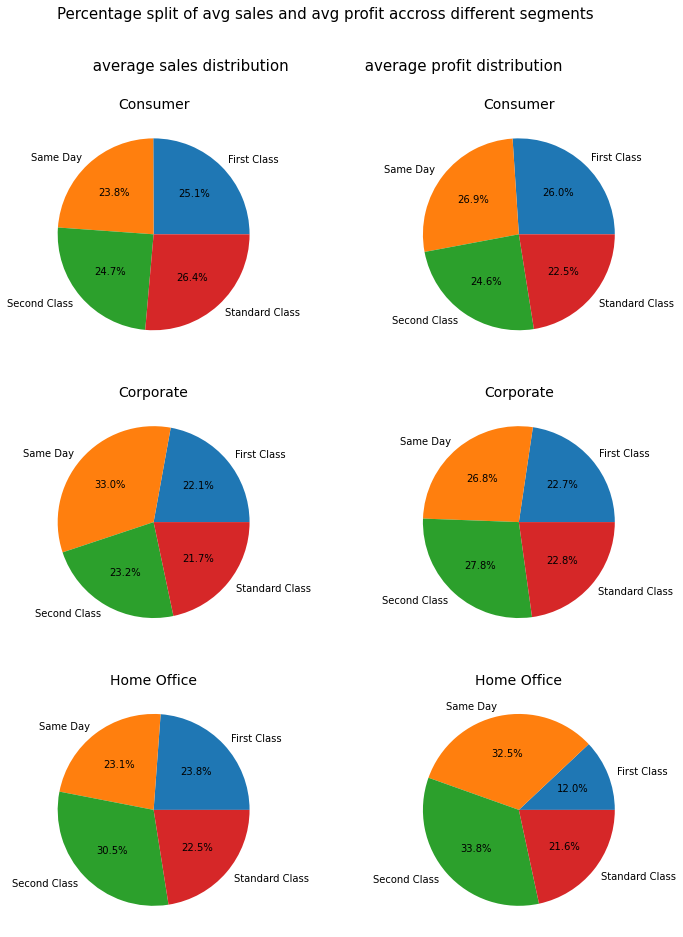

In [26]:
#----------------------Block 23----------------------------------

#visulaising observation of block 22
plt.rcParams['figure.figsize'] = (12, 15)
fig,axes=plt.subplots(3,2) #creating figure and multiple axes(here no. of axes=3*2=6)
#to give a main title to plots of all 6 axes
fig.suptitle('Percentage split of avg sales and avg profit accross different segments''\n\n\n average sales distribution                average profit distribution',fontsize=15)
segment_list=['Consumer','Corporate','Home Office'] #storing different segments in a list
label=['First Class','Same Day','Second Class','Standard Class'] #storing different ship modes in a list
#pie plot for average sales for each segment
m=0;j=0;k=3
for x in range(1):
      for y in range(3):
        axes[y,x].pie(segment_avgsalesnprofit_df.loc[j:k,'Avg sales in USD'],labels=label, autopct='%1.1f%%',radius=1) #plotting pie chart in each axes for average sales across each segment
        j=j+4;k=k+4
        axes[y,x].set_title(segment_list[m],fontsize=14) #setting title for pie plot of each axes
        m=m+1
#pie plot for average profit for each segment        
m=0;j=0;k=3  
for x in range(1,2):
      for y in range(3):
        axes[y,x].pie(segment_avgsalesnprofit_df.loc[j:k,'Avg profit in USD'],labels=label,autopct='%1.1f%%',radius=1) #plotting pie chart in each axes for average profit across each segment
        j=j+4;k=k+4
        axes[y,x].set_title(segment_list[m],fontsize=14)
        m=m+1  

*Though standard class has most no. of shipments but from block 22 and block 23, we can observe that :*
* *For consumer segment, maximum average sales is from standard class followed by first class and then second class but maximum profit is from Same day mode followed by first class.*
* *For corporate segment, maximum average sales is from same day but maximum profit is from second class followed by same day.*
* *For home office, maximum average sale is from second class & maximum profit is also from second class. Here sales from same day is comparatively less but profit from it is approximately same as of secondary class profit .*




##**Visualising and analysing about average sales and average profit for different regions and states**

###**Which state has maximum shipments, maximum average sales and profit in each region?**

In [27]:
#----------------------Block 24----------------------------------

#checking for quantity delivered, average sales and average profit for each state of each region
region_state_profit_df=updated_superstore_df.groupby(['Region','State']).agg({'Quantity':'sum','Sales':'mean','Profit':'mean'}).reset_index() 
region_state_profit_df.rename(columns={'Sales':'Average sales in USD','Profit':'Average profit in USD'},inplace=True)
region_state_profit_df                             

,Region,State,Quantity,Average sales in USD,Average profit in USD
0,Central,Illinois,1819,143.972990,-20.567185
1,Central,Indiana,559,212.131986,61.288628
2,Central,Iowa,112,152.658667,39.460397
3,Central,Kansas,74,121.429583,34.851813
4,Central,Michigan,916,201.466233,54.980071
5,Central,Minnesota,311,184.226744,56.300238
6,Central,Missouri,240,205.330781,63.280662
7,Central,Nebraska,132,134.728919,34.948816
8,Central,North Dakota,30,131.415714,32.878529
9,Central,Oklahoma,247,298.233182,73.544788


*From block 24 we are not getting any clear insights about how quantities delivered, average sales and average profit is related.*

*But we have following observations from above block :*
* *For central region, Texas has most of the shipment but average sales and average profit for it is low, infact company is having loss in this state.*
* *For east region,NewYork has most no. of shipment but average sales and average profit for it is not that good.*
* *For south region, Florida has most no. of shipment but company is facing loss here too.*
* *For west region, California has most no. of shipment but profits are not satisfying here as well.*

*The possible reasons for losses could be high transportation charges in these states,or this could also be possible that these people order things which are of low cost and companies deliever these items to them but gets loss due to high shipping cost.*

**Let's explore it more to get clear insights. Let's try to find out is there any relation between category, average sales and average profit for each state.**

###**How average sales and profit varying according to category of product in each region?**

In [28]:
#----------------------Block 25----------------------------------

#checking for average sales and average profit for each category in each region
salesprofit_acrdnto_regionandcategory_df=updated_superstore_df.groupby(['Region','Category']).agg({'Sales':'mean','Profit':'mean'}).reset_index() 
salesprofit_acrdnto_regionandcategory_df.rename(columns={'Sales':'Average sales','Profit':'Average profit'},inplace=True)
salesprofit_acrdnto_regionandcategory_df

,Region,Category,Average sales,Average profit
0,Central,Furniture,306.545704,-11.004993
1,Central,Office Supplies,84.255726,7.480654
2,Central,Technology,290.458577,52.946508
3,East,Furniture,285.404492,4.216717
4,East,Office Supplies,101.028043,19.227604
5,East,Technology,307.029441,40.547546
6,South,Furniture,302.643458,23.447572
7,South,Office Supplies,102.869726,18.388640
8,South,Technology,293.028331,59.532050
9,West,Furniture,314.998626,12.887803


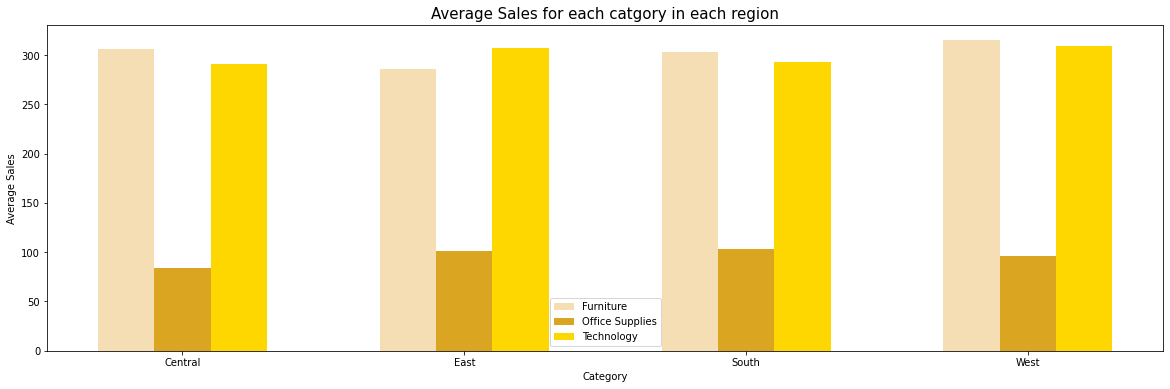

In [29]:
#----------------------Block 26----------------------------------

#visualising block 25
plt.rcParams['figure.figsize']=(20,6)
region_list=list(set(salesprofit_acrdnto_regionandcategory_df['Region'])) #storing all distinct region in a list
furniture_category = salesprofit_acrdnto_regionandcategory_df[salesprofit_acrdnto_regionandcategory_df['Category']=='Furniture'] #creating a subdataframe where category is furniture
office_supplies_category = salesprofit_acrdnto_regionandcategory_df[salesprofit_acrdnto_regionandcategory_df['Category']=='Office Supplies'] #creating a subdataframe where category is office supplies
tech_category =  salesprofit_acrdnto_regionandcategory_df[salesprofit_acrdnto_regionandcategory_df['Category']=='Technology'] #creating a subdataframe where category is technology
x_axis=np.arange(len(region_list)) #to get evenly spaced values within len(region_list)
plt.bar(x_axis-0.2,furniture_category['Average sales'],label ='Furniture',color='wheat',width=0.2) #to get first bar stick of group of three bars
plt.bar(x_axis,office_supplies_category['Average sales'],label ='Office Supplies',color='goldenrod',width=0.2) #to get second bar stick of group of three bars
plt.bar(x_axis+0.2,tech_category ['Average sales'],label ='Technology',color='gold',width=0.2) #to get third bar stick of group of three bars
plt.legend() #to place legend in the figure
plt.xticks(x_axis,furniture_category ['Region'])  #to put x-axis tocks in graph
plt.xlabel('Category')
plt.ylabel('Average Sales')
plt.title("Average Sales for each catgory in each region",fontsize=15)
plt.show()

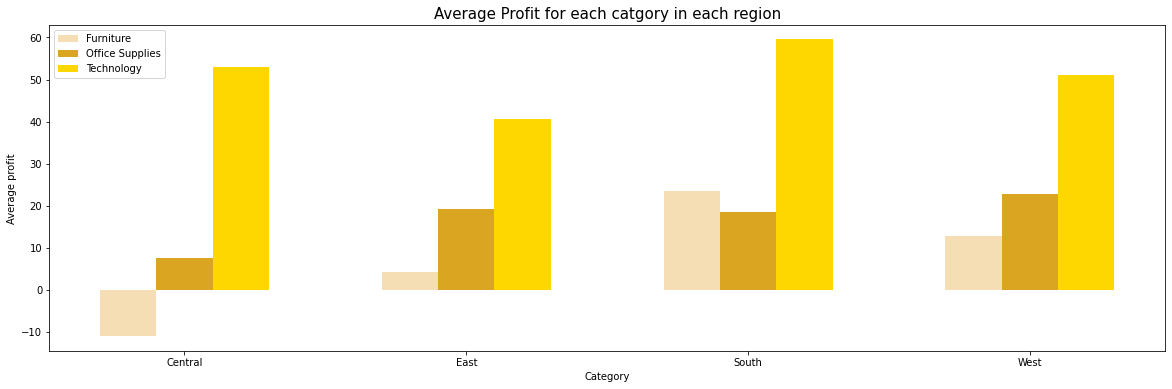

In [30]:
#----------------------Block 27----------------------------------

plt.rcParams['figure.figsize']=(20,6)
region_list=list(set(salesprofit_acrdnto_regionandcategory_df['Region'])) #storing all distinct region in a list
furniture_category =salesprofit_acrdnto_regionandcategory_df[salesprofit_acrdnto_regionandcategory_df['Category']=='Furniture'] #creating a subdataframe where category is furniture
office_supplies_category = salesprofit_acrdnto_regionandcategory_df[salesprofit_acrdnto_regionandcategory_df['Category']=='Office Supplies'] #creating a subdataframe where category is office supplies
tech_category =  salesprofit_acrdnto_regionandcategory_df[salesprofit_acrdnto_regionandcategory_df['Category']=='Technology'] #creating a subdataframe where category is technology
x_axis=np.arange(len(region_list)) #to get evenly spaced values within len(region_list)
plt.bar(x_axis-0.2,furniture_category['Average profit'],label ='Furniture',color='wheat',width=0.2) #to get first bar stick of group of three bars
plt.bar(x_axis,office_supplies_category['Average profit'],label ='Office Supplies',color='goldenrod',width=0.2) #to get second bar stick of group of three bars
plt.bar(x_axis+0.2,tech_category ['Average profit'],label ='Technology',color='gold',width=0.2) #to get third bar stick of group of three bars
plt.legend() #to place legend in the figure
plt.xticks(x_axis,furniture_category ['Region'])
plt.xlabel('Category')
plt.ylabel('Average profit')
plt.title("Average Profit for each catgory in each region",fontsize=15)
plt.show()

*From blocks 26 and 27 we can observe:*


*For each region, maximum profit is for technology either it have maximum average sales or not.*

*Both average sales and average profit for Office Supplies is comparatively low. Possible reason for this could be, generally Office supplies are low in cost.*

*Average sales for furniture is almost same as for technology, but average profit gain for it is not satisfying, possibly because furniture items are heavy and these needs high transportation cost for delievery and sometimes these get break in between, this might be the cause of less profit or even loss.*

###**City with highest no. of customers and profit**

In [31]:
#----------------------Block 28----------------------------------

#top 10 cities in terms of highest number of customers
highest_customers_cities_df=superstore_df.groupby('City').agg({'Postal Code':'count','Sales':'mean','Profit':'mean'}).sort_values(by='Postal Code',ascending=False)[0:10] # grouping by city and counting no. of customers and sorting values of customers in decreasing order then to get city with highest no. of customers
highest_customers_cities_df.rename(columns={'Postal Code':'Customers','Sales':'Avg sales','Profit':'Avg profit'},inplace=True)
highest_customers_cities_df

,Customers,Avg sales,Avg profit
City,,,
New York City,914,280.436588,67.848903
Los Angeles,746,235.699599,40.792797
Philadelphia,536,203.472875,-25.826885
San Francisco,506,222.484530,34.518021
Seattle,424,281.745948,68.683213
Houston,375,171.843350,-27.133801
Chicago,313,155.067019,-21.240677
Columbus,221,173.868195,26.738281
San Diego,170,279.535465,37.512918


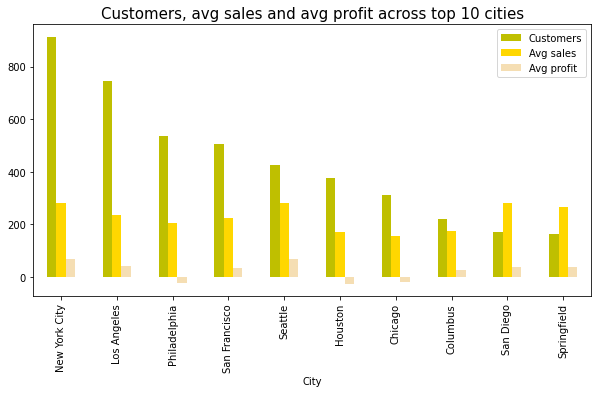

In [32]:
#----------------------Block 29----------------------------------

plt.rcParams['figure.figsize']=(10,5)
highest_customers_cities_df.plot.bar(color=['y','gold','wheat']) #bar plot for block 28 observation
plt.title('Customers, avg sales and avg profit across top 10 cities',fontsize=15)
plt.show()

*New York city is having highest no. of customers, avg sales and avg profit followed by Los Angeles*

*Some top 10 cities have good average sales but they are facing loss, reason could be same, transportation charge, category of item ordered by these people...*

*Though consumer segment has most no. of shipments but average sales for corporate is maximum and average profit for home office is maximum.*

* *Possible reason for this could be consumers order all the items from low cost to high cost, but corporate segment orders related products to company like machines, furnitures, office supplies(in bulk) which leads to high sales for this segment but high shipment charges may eat up its revenue leading to low profit.*
* *Home office customers are less b/c mostly people prefer to work in office rather than home, therefore sales is less for this segment but they mostly order products like furnitures, office supplies (in bulk) leading to good profit to the company.*


##**Visualising and analysing about categories and subcategories**

###**Which sub category of each category has highest sales and profit?**

In [33]:
#----------------------Block 30----------------------------------

#grouping by category and subcategory and finding mean of sales and profit accross each category and subcategory
profitnsales_across_subcategories_df=updated_superstore_df.groupby(['Category','Sub-Category']).agg({'Sales':'mean','Profit':'mean'}).reset_index()
profitnsales_across_subcategories_df.rename(columns={'Sales':'Avg sales','Profit':'Avg profit'},inplace=True)
profitnsales_across_subcategories_df

,Category,Sub-Category,Avg sales,Avg profit
0,Furniture,Bookcases,405.424421,-13.075068
1,Furniture,Chairs,466.653739,35.182006
2,Furniture,Furnishings,95.902745,13.653476
3,Furniture,Tables,556.436223,-56.912476
4,Office Supplies,Appliances,206.328289,34.380644
5,Office Supplies,Art,34.096896,8.207059
6,Office Supplies,Binders,71.894358,10.167824
7,Office Supplies,Envelopes,64.867724,27.418019
8,Office Supplies,Fasteners,13.936774,4.375660
9,Office Supplies,Labels,34.283504,15.224193


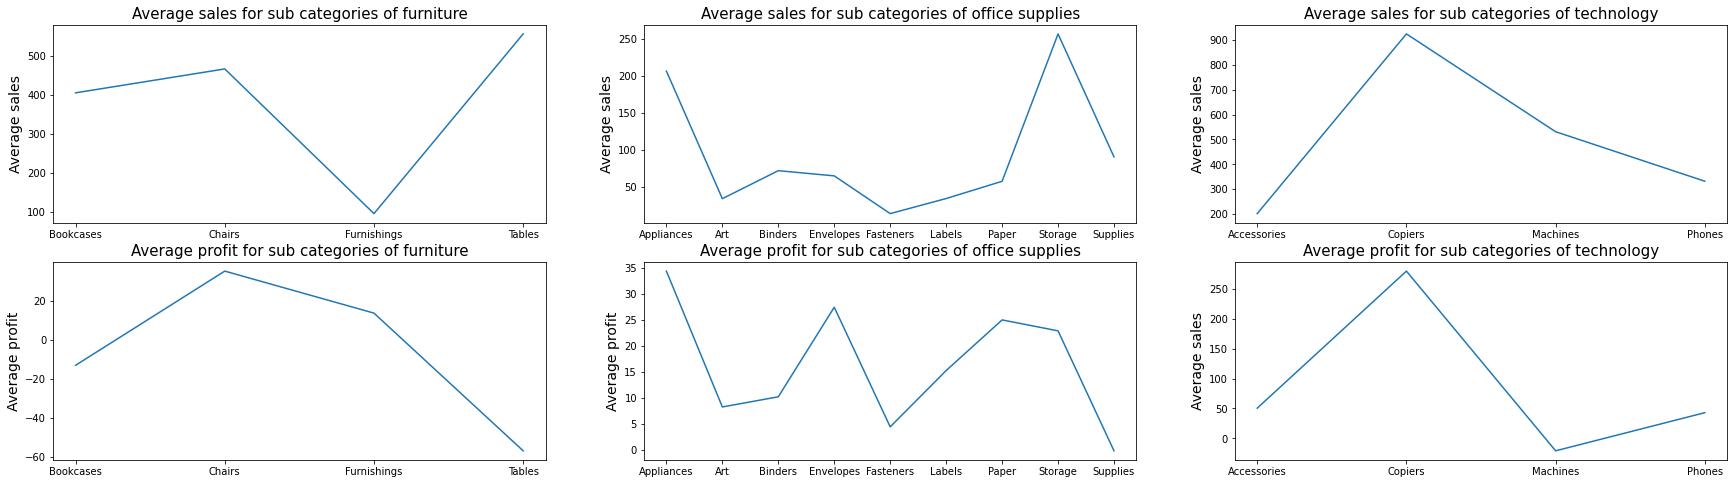

In [34]:
#----------------------Block 31----------------------------------

furniture_category= profitnsales_across_subcategories_df[profitnsales_across_subcategories_df['Category']=='Furniture'] #creating a subdataframe from above dataframe where category is furniture
office_supplies_category= profitnsales_across_subcategories_df[profitnsales_across_subcategories_df['Category']=='Office Supplies'] #creating a subdataframe from above dataframe where category is office supplies
tech_category=profitnsales_across_subcategories_df[profitnsales_across_subcategories_df['Category']=='Technology'] #creating a subdataframe from above dataframe where category is technology
plt.rcParams['figure.figsize']=(30,8)
fig,axes=plt.subplots(2,3) #creating figure and multiple axes(3*2=6)
axes[0][0].plot(furniture_category['Sub-Category'],furniture_category['Avg sales']) #line plot for average sales for furniture category
axes[0][0].set_title('Average sales for sub categories of furniture',fontsize=15)
axes[0][0].set_ylabel('Average sales',fontsize=14)
axes[0][1].plot(office_supplies_category['Sub-Category'],office_supplies_category['Avg sales'])  #line plot for average sales for office supplies category
axes[0][1].set_title('Average sales for sub categories of office supplies',fontsize=15)
axes[0][1].set_ylabel('Average sales',fontsize=14)
axes[0][2].plot(tech_category['Sub-Category'],tech_category['Avg sales'])  #line plot for average sales for tech category
axes[0][2].set_title('Average sales for sub categories of technology',fontsize=15)
axes[0][2].set_ylabel('Average sales',fontsize=14)
axes[1][0].plot(furniture_category['Sub-Category'],furniture_category['Avg profit'])  #line plot for average profit for furniture category
axes[1][0].set_title('Average profit for sub categories of furniture',fontsize=15)
axes[1][0].set_ylabel('Average profit',fontsize=14)
axes[1][1].plot(office_supplies_category['Sub-Category'],office_supplies_category['Avg profit'])  #line plot for average profit for office supplies category
axes[1][1].set_title('Average profit for sub categories of office supplies',fontsize=15)
axes[1][1].set_ylabel('Average profit',fontsize=14)
axes[1][2].plot(tech_category['Sub-Category'],tech_category['Avg profit'])  #line plot for average sales for tech category
axes[1][2].set_title('Average profit for sub categories of technology',fontsize=15)
axes[1][2].set_ylabel('Average sales',fontsize=14)
plt.show()

*From block 30 and 31 we can observe:*

*For furniture, comapny is having loss in bookcases and tables and maximum profit in chairs*

*For office supplies, company is having loss in supplies and maximum profit in appliances*

*For Technology, company is having loss in Machines and maximum profit in copiers*

###**How average sales and profit for each category is varying in the states having maximum shipment in each region?**

In [35]:
#----------------------Block 32----------------------------------

#exploring for more information found in block 24
#checking for average sales and average profit for each category for the states having most no. of shipment for each region
city_category_df=updated_superstore_df.groupby(['State','Category']).agg({'Sales':'mean','Profit':'mean'}).reset_index()
subdf_from_city_category_df=city_category_df[(city_category_df['State']=='California') | (city_category_df['State']=='Florida') | (city_category_df['State']=='New York') | (city_category_df['State']=='Texas')]
subdf_from_city_category_df.rename(columns={'Sales':'Average sales','Profit':'Average profit'},inplace =True)
subdf_from_city_category_df

,State,Category,Average sales,Average profit
9,California,Furniture,312.635354,19.423169
10,California,Office Supplies,98.701211,27.839901
11,California,Technology,329.764870,61.841261
24,Florida,Furniture,240.275214,-26.845008
25,Florida,Office Supplies,79.706794,-2.822751
26,Florida,Technology,297.935224,30.064045
90,New York,Furniture,302.719553,15.357717
91,New York,Office Supplies,108.557979,30.392043
92,New York,Technology,329.966984,95.793435
121,Texas,Furniture,278.717981,-48.842495


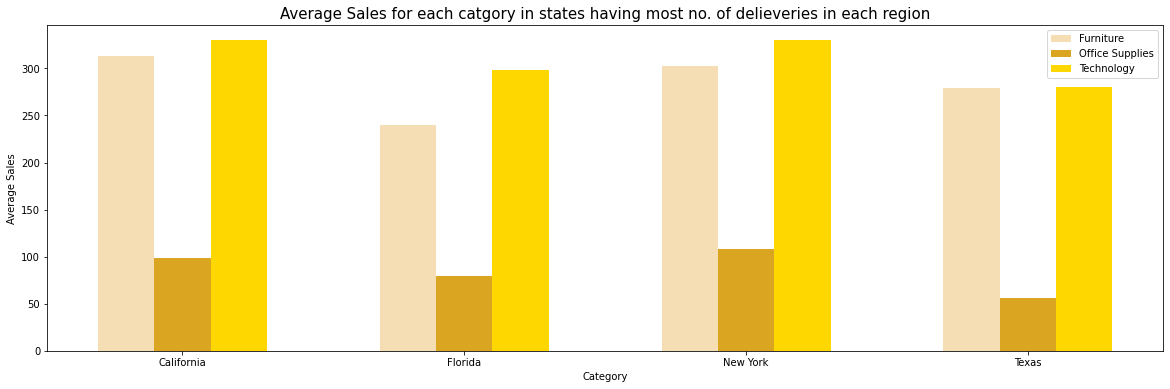

In [36]:
#----------------------Block 33----------------------------------

#visualising block 32
plt.rcParams['figure.figsize']=(20,6)
category_list=list(set(subdf_from_city_category_df['State'])) #storing all states from block 25 in alist
furniture_category = subdf_from_city_category_df[subdf_from_city_category_df['Category']=='Furniture'] #creating a subdataframe where category is furniture
office_supplies_category = subdf_from_city_category_df[subdf_from_city_category_df['Category']=='Office Supplies'] #creating a subdataframe where category is office supplies
tech_category =  subdf_from_city_category_df[subdf_from_city_category_df['Category']=='Technology'] #creating a subdataframe where category is technology
x_axis=np.arange(len(category_list)) #to get evenly spaced values within len(category_list)
plt.bar(x_axis-0.2,furniture_category['Average sales'],label ='Furniture',color='wheat',width=0.2) #to get first bar stick of group of three bars
plt.bar(x_axis,office_supplies_category['Average sales'],label ='Office Supplies',color='goldenrod',width=0.2) #to get second bar stick of group of three bars
plt.bar(x_axis+0.2,tech_category ['Average sales'],label ='Technology',color='gold',width=0.2) #to get third bar stick of group of three bars
plt.legend() #to place legend in the figure
plt.xticks(x_axis,furniture_category ['State'])
plt.xlabel('Category')
plt.ylabel('Average Sales')
plt.title("Average Sales for each catgory in states having most no. of delieveries in each region",fontsize=15)
plt.show()

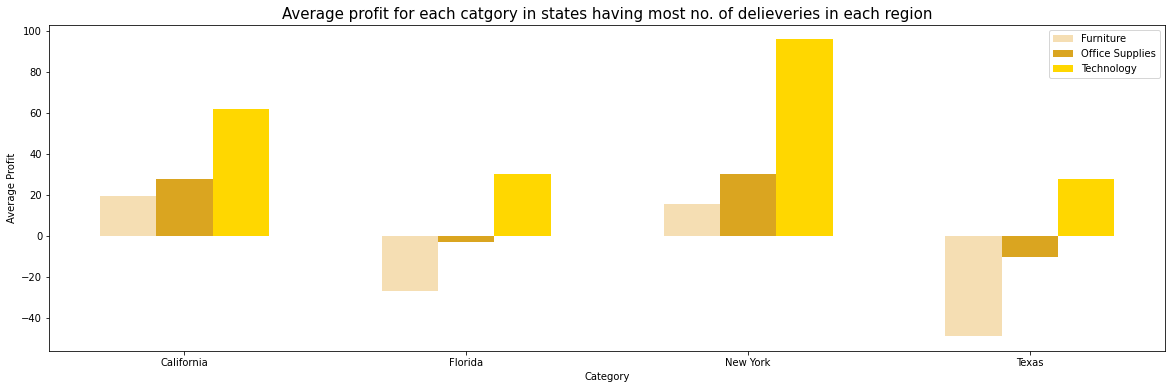

In [37]:
#----------------------Block 34----------------------------------

furniture_category = subdf_from_city_category_df[subdf_from_city_category_df['Category']=='Furniture'] #creating a subdataframe where category is furniture
office_supplies_category = subdf_from_city_category_df[subdf_from_city_category_df['Category']=='Office Supplies'] #creating a subdataframe where category is office supplies
tech_category =  subdf_from_city_category_df[subdf_from_city_category_df['Category']=='Technology'] #creating a subdataframe where category is technology
x_axis=np.arange(len(category_list)) #to get evenly spaced values within len(category_list)
plt.bar(x_axis-0.2,furniture_category['Average profit'],label ='Furniture',color='wheat',width=0.2) #to get first bar stick of group of three bars
plt.bar(x_axis,office_supplies_category['Average profit'],label ='Office Supplies',color='goldenrod',width=0.2) #to get second bar stick of group of three bars
plt.bar(x_axis+0.2,tech_category ['Average profit'],label ='Technology',color='gold',width=0.2) #to get third bar stick of group of three bars
plt.legend() #to place legend in the figure
plt.xticks(x_axis,furniture_category ['State'])
plt.xlabel('Category')
plt.ylabel('Average Profit')
plt.title("Average profit for each catgory in states having most no. of delieveries in each region",fontsize=15)
plt.show()

*For all the four states, highest average sales is for technology and lowest is for office supplies.*

*For all four states, highest average profit is for technology while lowest is for furniture, infact in Florida and Texas company is having losses.*

*In Florida and Texas, company is having loss for office supplies.*

*Average profit for technology is maximum in New York followed by California.*



##**Visualising and analysing how quantity, sales and profit varies with discount**

In [38]:
#----------------------Block 35----------------------------------

updated_superstore_df[['Sales','Quantity','Discount','Profit']].corr() #checking for correlation 

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.253175,-0.057427,0.406212
Quantity,0.253175,1.000000,0.008666,0.101649
Discount,-0.057427,0.008666,1.000000,-0.370841
Profit,0.406212,0.101649,-0.370841,1.000000


*There is no high correlation between these features.*

*Sales and profit is little positively related and this is understable as well b/c as sales increases, profit also gets increases.*

*Discount and profit is little negatively related and this is understable as well b/c as discount increases, profit get decreases.*

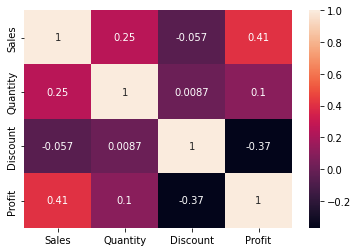

In [39]:
#----------------------Block 36----------------------------------

plt.rcParams['figure.figsize']=(6,4)
sns.heatmap(updated_superstore_df[['Sales','Quantity','Discount','Profit']].corr(),annot=True) #heatmap 
plt.show()

###**How quantity is varying with discount?**

In [40]:
#----------------------Block 37----------------------------------

discount_quantity_relation_df=superstore_df.groupby('Discount').agg({'Quantity':'sum'}) #grouping by discount and calculate no. of quantities
discount_quantity_relation_df

,Quantity
Discount,
0.00,18230
0.10,373
0.15,198
0.20,13649
0.30,847
0.32,105
0.40,786
0.45,45
0.50,241


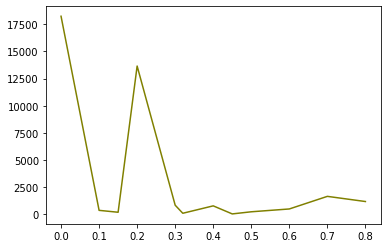

In [41]:
#----------------------Block 38----------------------------------

plt.plot(discount_quantity_relation_df,color='olive') #line plot for block 36

*no any direct relation between quantity ordered and discount.*

###**How sales and profit is varying with discount?**

In [42]:
#----------------------Block 39----------------------------------

discount_sales_profit_df=updated_superstore_df.groupby('Discount').agg({'Sales':'mean','Profit':'mean'}) #grouping by discount and finding average of sales and profit
discount_sales_profit_df

,Sales,Profit
Discount,,
0.00,171.808121,47.804245
0.10,422.695023,69.051019
0.15,473.565833,24.679959
0.20,167.883837,17.202693
0.30,428.909281,-41.856458
0.32,465.276662,-79.768650
0.40,430.154955,-93.318444
0.45,498.634000,-226.646464
0.50,364.059113,-197.505040


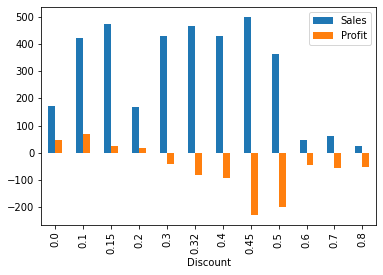

In [43]:
#----------------------Block 40----------------------------------

discount_sales_profit_df.plot.bar()

*We can observe that:*

*As discount increases, sales get increases first and then decreases for more than 50% discount.*

*And profit continuously decreases and even resulting in loss for company for more than 205discount.*

**So, we can conclude there is negative effect of discount on profit.**

#**Business problems and how to work on it to make more profit**

* *To increase profit for home office segment companies should switch more to same day and second class for shipment of valuable items, so that customers could get these on time and comapny can increse its profit.*

* *Consumer and corporate segment are the ones which has highest no. of orders, so company should provide them with good offers in favour of these people and choice of same day as well as of standard class and introducing special promotions and bundles for these customers in order to retain these customers.*

* *For corporate sector, average sales from same day is maximum but average profit from it is not satisfying. The reason could be corporate segment orders in bulk and transportation/shipment charges costs high to the company which may results in less profit from corporate segment.
So, for corporate sector company can choose first class over same day or can improve transportation arrangements to ship orders on the same day for corporate sector, so that profit from corporate could me maximised.*
* *For Home Offices customers, these people might be busy with work and less likely to spend time selecting individual products, so create a Home Office package with products used for offices such as table, chairs, phone, copiers, storage, label, fasteners, bookcases.*
* *Company should focus more on technology and furniture, try to find out how could cost associated with these items can be reduced to maximise the profit.*
* *On an average for all four states having maximum no. of shipments in each region, we can say company is not having satisfying sales and profit or sometimes loss as well for furniture and Office supplies. Possible reason for this could be low prices of office supplies and high shipment charges for furniture. So, company should switch for shipment of technological products and also should focus on how can they improve profit for furniture by logistic cost optimisation.*
* *For furniture, company is having loss in tables and bookcases but having profit in chairs, so comapny should come up with ideas like bundling tables and bookcases with  chairs, copiers, phones, office supplies to offset the loss.*
* *For office supplies, there is lot of demand for binders and papers, so comapny can offer pack of binders and papers with other office supplies items.*
* *For technology, company is having loss in machines, which can be rectified by considering about the cause of loss and how can it be improved.*
* *West and east region has highest no. of customers, so company should focus more on East and West region and Top 10 cities of these regions with Highest Sales by introducing special promotions and bundles for mass Consumer and Home Offices and send promotional emails or flyers..*
* *New York city and Los Angeles has highest no. of customers, company should focus on these cities to retain customers.*
* *Texas, Florida, California and New York are the states of different regions having most no. of customers but profit is not satisfying from these states, so company should look into this.*
* *Discount has negative effect on profit, so company should reduce discounts on products which are in high demand like tech items, chairs, home supplies but offer discounts  on the items like bookcases, tables, machines and come up with innovative offers like sell these in a bundle of pack with profitable items to have maximum gain from these items.*
* *There are many items in which company getting loss inspite of having good sales, for these items company should more focus on reducing shipment charges as this might be the reason for loss.*
